In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image

# Set the directory for your dataset
dataset_dir = r'E:\Deep Learning Datasets-20241106T032755Z-001\Deep Learning Datasets\Animal 10\Animal 10\raw-img'  # Replace with your dataset directory

# Set up ImageDataGenerator for training and validation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 20% of the data will be used for validation
)

# Load training data with 80% split for training and 20% for validation
train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(128, 128),  # Resize images to 128x128 for MobileNetV2
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Use the training subset
)

validation_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(128, 128),  # Resize images to 128x128 for MobileNetV2
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Use the validation subset
)

# Load MobileNetV2 pre-trained on ImageNet and exclude the top layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False  # Freeze the pre-trained layers to prevent them from being trained

# Build the model by adding custom layers on top of the base model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Global Average Pooling layer to reduce spatial dimensions
    Dense(1024, activation='relu'),  # Fully connected layer
    Dense(len(train_generator.class_indices), activation='softmax')  # Output layer for classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on the dataset
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=2,  # You can adjust the number of epochs based on your requirements
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

# Evaluate the model on the validation set
test_loss, test_acc = model.evaluate(validation_generator)
print(f"Test accuracy: {test_acc}")

# Now let's print actual and predicted labels for a few validation images
# Get the filenames and true labels from the validation generator
filenames = validation_generator.filenames
true_labels = validation_generator.classes

# Predict the labels on the validation data
predictions = model.predict(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Map the integer class labels to the actual class names
class_labels = {v: k for k, v in validation_generator.class_indices.items()}

# Print actual and predicted labels for a few inputs
num_samples = 5  # Print 5 samples
for i in range(num_samples):
    actual_label = class_labels[true_labels[i]]
    predicted_label = class_labels[predicted_labels[i]]
    print(f"Actual Label: {actual_label} | Predicted Label: {predicted_label}")

Found 20947 images belonging to 10 classes.
Found 5232 images belonging to 10 classes.


C:\Users\ADITYA\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/2
654/654 ━━━━━━━━━━━━━━━━━━━━ 383s 569ms/step - accuracy: 0.8732 - loss: 0.4175 - val_accuracy: 0.9222 - val_loss: 0.2344
Epoch 2/2
  1/654 ━━━━━━━━━━━━━━━━━━━━ 2:07 195ms/step - accuracy: 0.9688 - loss: 0.0993

C:\Users\ADITYA\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


654/654 ━━━━━━━━━━━━━━━━━━━━ 1s 865us/step - accuracy: 0.9688 - loss: 0.0993 - val_accuracy: 0.8750 - val_loss: 0.4224
164/164 ━━━━━━━━━━━━━━━━━━━━ 28s 172ms/step - accuracy: 0.9213 - loss: 0.2387
Test accuracy: 0.9220183491706848
163/163 ━━━━━━━━━━━━━━━━━━━━ 31s 174ms/step
Actual Label: cane | Predicted Label: gatto
Actual Label: cane | Predicted Label: gallina
Actual Label: cane | Predicted Label: cane
Actual Label: cane | Predicted Label: farfalla
Actual Label: cane | Predicted Label: ragno


Found 20947 images belonging to 10 classes.
Found 5232 images belonging to 10 classes.
Epoch 1/3
655/655 ━━━━━━━━━━━━━━━━━━━━ 470s 707ms/step - accuracy: 0.8462 - loss: 0.5037 - val_accuracy: 0.9213 - val_loss: 0.2414
Epoch 2/3
655/655 ━━━━━━━━━━━━━━━━━━━━ 427s 651ms/step - accuracy: 0.9394 - loss: 0.1839 - val_accuracy: 0.9216 - val_loss: 0.2394
Epoch 3/3
655/655 ━━━━━━━━━━━━━━━━━━━━ 421s 644ms/step - accuracy: 0.9528 - loss: 0.1418 - val_accuracy: 0.9258 - val_loss: 0.2422
164/164 ━━━━━━━━━━━━━━━━━━━━ 85s 516ms/step - accuracy: 0.9304 - loss: 0.2543
Test Loss: 0.23902888596057892

Test Accuracy: 0.9277523159980774
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


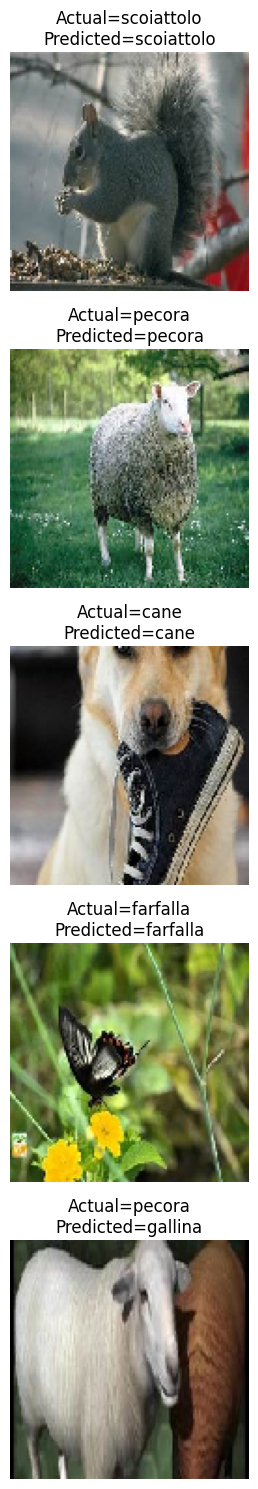

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import mixed_precision

# Set mixed precision training
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)

# Load MobileNetV2 model with ImageNet weights and excluding the top layers
# Modify the model's input shape to (128, 128, 3)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False

# Add custom layers for the specific task
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with Adam optimizer and categorical cross-entropy loss
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Data augmentation and rescaling
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True
    # You can experiment with other augmentations like zoom_range and shear_range here.
)

# Create the training data generator
train_generator = datagen.flow_from_directory(
    r"E:\Deep Learning Datasets-20241106T032755Z-001\Deep Learning Datasets\Animal 10\Animal 10\raw-img",
    target_size=(128, 128),  # Lower resolution for faster training
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    r"E:\Deep Learning Datasets-20241106T032755Z-001\Deep Learning Datasets\Animal 10\Animal 10\raw-img",
    target_size=(128, 128),  # Lower resolution for faster training
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Train the model (reduced epochs for faster feedback)
history = model.fit(
    train_generator, 
    validation_data=validation_generator, 
    epochs=3,  # You can try a few more epochs if needed
    batch_size=64  # Increased batch size (adjust according to GPU memory)
)

# Evaluate the model on validation data
test_loss, test_acc = model.evaluate(validation_generator)

print("Test Loss:", test_loss)
print("\nTest Accuracy:", test_acc)

# Get predictions and plot results
x_val, y_val = next(validation_generator)
predictions = model.predict(x_val)
predicted_labels = np.argmax(predictions, axis=1)

# Display some sample results
n = 5
class_labels = list(train_generator.class_indices.keys())
plt.figure(figsize=(5, 15))
for i in range(n):
    plt.subplot(n, 1, i + 1)
    plt.imshow(x_val[i])
    actual_label = class_labels[np.argmax(y_val[i])]
    predicted_label = class_labels[predicted_labels[i]]
    plt.title(f"Actual={actual_label}\nPredicted={predicted_label}")
    plt.axis("off")
plt.tight_layout()
plt.show()